# Exercise - Visualization of Data

### Step 1. Import the necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

### Step 2. Import the dataset from the AutoMPG dataset file. Assign it to a variable called mpg_df

In [128]:
mpg_df=pd.read_csv("https://raw.githubusercontent.com/kartech06/Datasets/main/auto-mpg.csv")

### Step 3. Perform basic EDA to understand the structure of the data

In [31]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 24.9+ KB


### Step 4. Check and handle the missing values, if any.

In [64]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

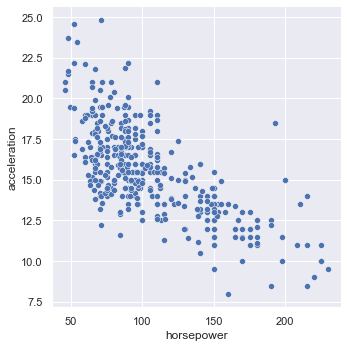

In [113]:
mpg_df['horsepower'].replace('?', float('nan'), inplace=True)
mpg_df['horsepower']=pd.to_numeric(mpg_df['horsepower'])
mpg_df.dtypes
# Plotting
sns.relplot(x='horsepower',y='acceleration',data=mpg_df,palette=['red'])
plt.show()
##Insights
#More the Acceleration lesser the horsepower

### Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same

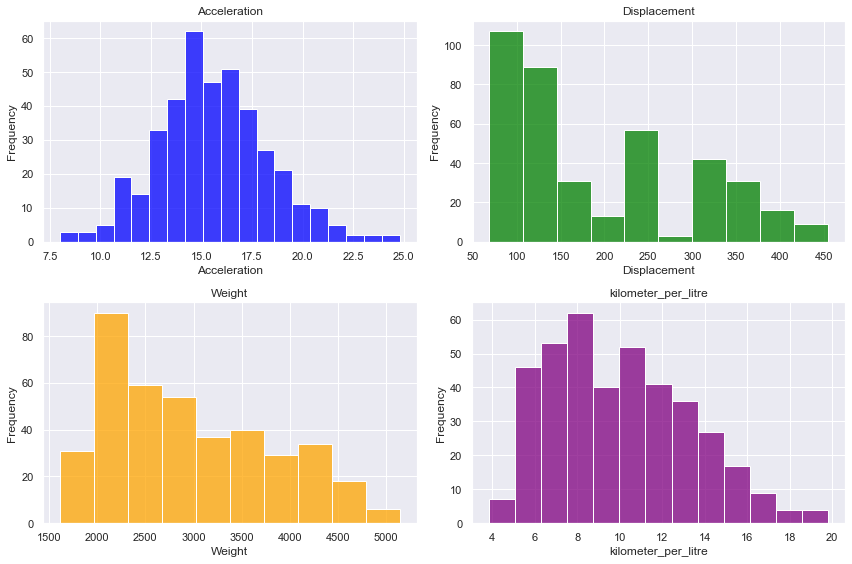

In [129]:
mpg_df['kilometer_per_litre']=mpg_df['mpg'] * 0.425144

# mpg_df['kilometer_per_litre']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))


sns.histplot(mpg_df['acceleration'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Acceleration')
axes[0, 0].set_xlabel('Acceleration')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(mpg_df['displacement'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Displacement')
axes[0, 1].set_xlabel('Displacement')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(mpg_df['weight'], ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Weight')
axes[1, 0].set_xlabel('Weight')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(mpg_df['kilometer_per_litre'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title('kilometer_per_litre')
axes[1, 1].set_xlabel('kilometer_per_litre')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()

plt.show()

# insights
# acceleration count is increasing until 15, then descreases
# displacement count is decreases until 200, then slowly descreases
# weight count is increasing sharply at 2000, then descreases
# MPG count is sharp increasing until 20, then descreases

### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file. 

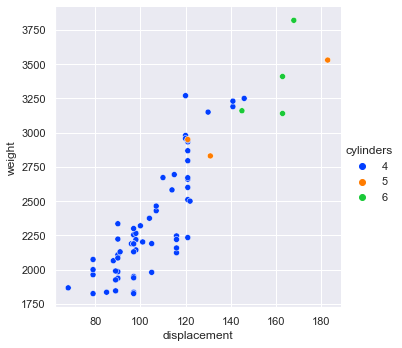

In [136]:
mpg_df['cylinders'].unique()

temp_df=mpg_df[mpg_df['origin']==2]

sns.relplot(x='displacement',y='weight',hue='cylinders',data=temp_df,palette="bright")
plt.savefig('scatter_plot.png', dpi=300)
plt.show()

##Insights
#More the displacement more the weight
#Majority are 4 cylinders
#We have only 3 values for 5 cylinders in which 3 lies between 120-140 displacement and 2750 - 3000 weight and other has slightly more than 180 displacement and weight is slightly more than 3500
#For 6 cylinders its range between displacement (140-170) and weight (3000-4000)

### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

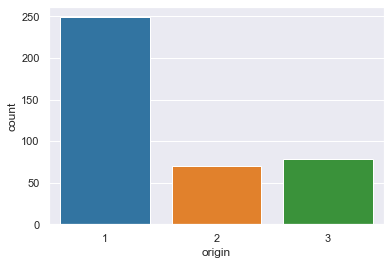

In [115]:
sns.countplot(x='origin',data=mpg_df,palette='tab10')
plt.show()

#for Origin 1 count is 250 
#for Origin 2 count is 70
#for Origin 3 count is 80

### Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same


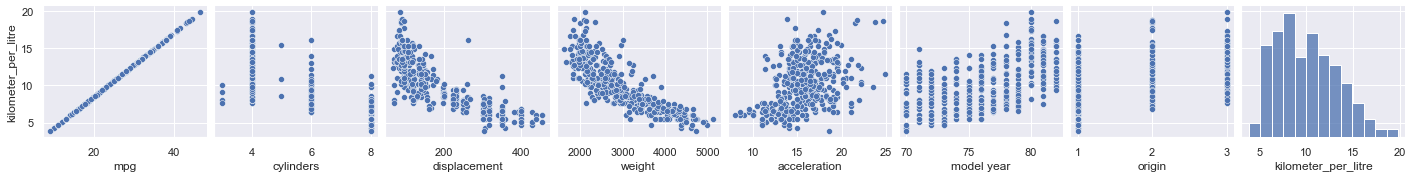

In [133]:
sns.pairplot(mpg_df, y_vars=["kilometer_per_litre"],palette='tab10')
plt.show()

### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

   cylinders       weight
0          3  2398.500000
1          4  2308.127451
2          5  3103.333333
3          6  3198.226190
4          8  4114.718447


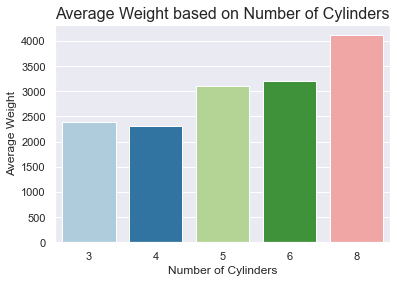

In [92]:
avg_df=mpg_df.groupby('cylinders')['weight'].mean().reset_index()
print(avg_df)
sns.barplot(data=avg_df,x='cylinders',y='weight',palette='Paired')
plt.title("Average Weight based on Number of Cylinders", fontsize=16) 
plt.xlabel("Number of Cylinders", fontsize=12)
plt.ylabel("Average Weight", fontsize=12)
plt.show()

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

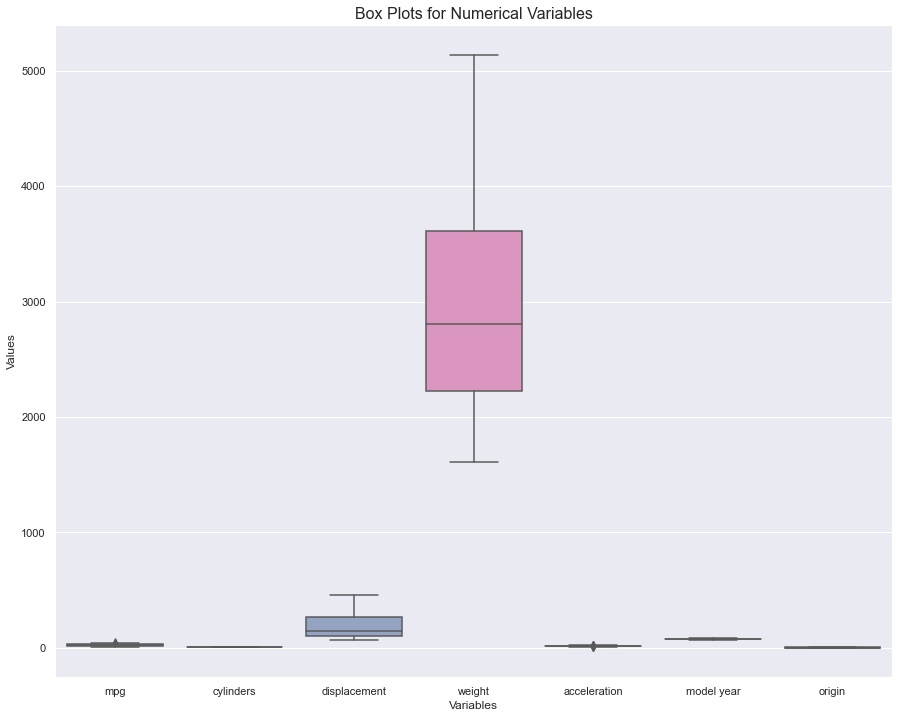

In [134]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=data, orient='v', palette='Set2')  
plt.title("Box Plots for Numerical Variables", fontsize=16)  
plt.xlabel("Variables", fontsize=12)  
plt.ylabel("Values", fontsize=12) 
plt.show()

[11:37 pm] Raksha Panwar

#insights

# for displacement outlier values are below 50 and above 500

# for weights outlier values are below 1500 and above are 5200

# and so on for others

### Step 12. Plot the correlations for variables.

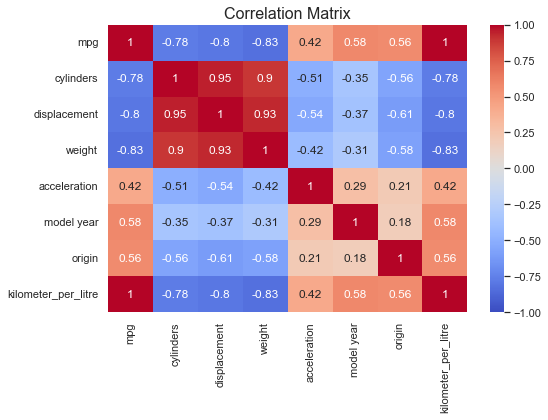

In [135]:
corr_data=mpg_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_data, annot=True,cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()